# Assignment : Lead Scoring

## Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

Data You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out for are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).

## Business Goal

Built a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

#### Below are the steps which we will be basically following:

1. [Step 1: Reading and Understanding the Data](#1)
1. [Step 2: Data Cleansing](#2)
1. [Step 3: EDA](#3)
1. [Step 4: Data Transformation](#4)
1. [Step 5: Data Preparation](#5) 
1. [Step 6: Building a Model](#6)
1. [Step 7: Creating a prediction](#7)
1. [Step 8: Evaluation of ModelModel Building](#8)
1. [Step 9: Optimise Cut off (ROC Curve)](#9)
1. [Step 10: Test Set Prediction](#10)
1. [Step 11: Lead Score assigning](#11)
1. [Step 12: Conclusion](#12)

<a id="1"></a> <br>
## Step 1: Reading and Understanding the Data

In [1]:
# import the required libraries
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
import seaborn as sns
### Supress unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the data dictionary file

df_structure = pd.read_excel('Leads_Data_Dictionary.xlsx')
df_structure = df_structure.drop([0]) #drop first row of the Excel sheet
df_structure = df_structure.drop('Unnamed: 0', axis=1) #remove the column 'A' in excel

df_structure.head(100)

,Unnamed: 1,Unnamed: 2
1,Variables,Description
2,Prospect ID,A unique ID with which the customer is identif...
3,Lead Number,A lead number assigned to each lead procured.
4,Lead Origin,The origin identifier with which the customer ...
5,Lead Source,"The source of the lead. Includes Google, Organ..."
6,Do Not Email,An indicator variable selected by the customer...
7,Do Not Call,An indicator variable selected by the customer...
8,Converted,The target variable. Indicates whether a lead ...
9,TotalVisits,The total number of visits made by the custome...
10,Total Time Spent on Website,The total time spent by the customer on the we...


In [3]:
# Reading the data file on which analysis needs to be done

df_leads = pd.read_csv('Leads.csv')

df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
df_leads.shape

(9240, 37)

In [5]:
df_leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


As observed from above table, some of the variables like 'TotalVisits', 'Total Time Spent on Website' and 'Page Views per Visit' have outliers while others not so much

In [6]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

<a id="2"></a> <br>
## Step 2 : Data Cleansing

We will need to do some basic cleansing check before we start with model building process.

In [7]:
#check for duplicates
sum(df_leads.duplicated(subset = 'Prospect ID')) == 0


True

In [8]:
#check for duplicates
sum(df_leads.duplicated(subset = 'Lead Number')) == 0

True

In [9]:
# dropping Prospect ID and Lead Number column since these columns are indicative of contact identification.
df_leads.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [10]:
sum(df_leads.duplicated(subset = 'City')) == 0

False

<b>Let's find out which columns/categories is having 'Select' label</b>

In [11]:
# Creating a for loop and the required columns are appended into a new list

cols=list(df_leads.columns)
test=['Select']
text=[]
for i in range(len(cols)):
    if len(df_leads[cols[i]].isin(test).unique())>1:
        text.append(cols[i])
  
text # column names having label 'Select'




['Specialization',
 'How did you hear about X Education',
 'Lead Profile',
 'City']

In [12]:
 #checking value counts of Specialization column

df_leads['Specialization'].value_counts(dropna=False)



Select                               1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [13]:
# replacing the Select with Nan's.


df_leads['Specialization'] = df_leads['Specialization'].replace('Select',np.nan)



In [14]:
#checking value counts of What matters most to you in choosing a course column
df_leads['How did you hear about X Education'].value_counts(dropna=False)

Select                   5043
NaN                      2207
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [15]:
# replacing the Select with Nan's.
df_leads['How did you hear about X Education'] = df_leads['How did you hear about X Education'].replace('Select',np.nan)


In [16]:
df_leads['Lead Profile'].value_counts(dropna=False)

Select                         4146
NaN                            2709
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [17]:
# replacing the Select with Nan's.
df_leads['Lead Profile'] = df_leads['Lead Profile'].replace('Select',np.nan)

In [18]:
df_leads['City'].value_counts(dropna=False)

Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [19]:
# replacing the Select with Nan's.
df_leads['City'] = df_leads['City'].replace('Select',np.nan)

In [20]:
# Calculating the Missing Values % contribution in DF

df_null = df_leads.isna().mean()*100
df_null.sort_values(ascending = False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Index                      45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [21]:
# lets drop columns with null values greater than 30%
drop_cols = []
for col in df_leads.columns:
    if round(100*(df_leads[col].isnull().sum()/len(df_leads.index)), 2)>30:
        drop_cols.append(col)

print("dropping columns:",drop_cols)
df_leads.drop(drop_cols,1,inplace = True)


dropping columns: ['Specialization', 'How did you hear about X Education', 'Tags', 'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']


In [22]:
# Checking if there are columns with one unique value since it won't affect our analysis
df_leads.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement                               2
Through Recommendations     

In [23]:
# Dropping unique valued columns
df_leads= df_leads.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)



In [24]:
# Checking % of null values again
df_null = df_leads.isna().mean()*100
df_null.sort_values(ascending = False)

# we will treat these null values in a while



What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
Total Time Spent on Website                       0.000000
Last Notable Activity                             0.000000
A free copy of Mastering The Interview            0.000000
Search                                            0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.000000
Newspaper                                         0.0000

In [25]:
# Rechecking the percentage of missing values
round(100*(df_leads.isnull().sum()/len(df_leads.index)), 2)


Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Recommendations                           0.00
A free cop

In [26]:
#checking value counts of Country column


df_leads['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
South Africa               4
Nigeria                    4
Kuwait                     4
Canada                     4
Germany                    4
Sweden                     3
Uganda                     2
Bangladesh                 2
Italy                      2
Ghana                      2
Netherlands                2
China                      2
Belgium                    2
Philippines                2
Asia/Pacific Region        2
Kenya                      1
Indonesia                  1
Denmark                    1
Vietnam                    1
Malaysia                   1
Switzerland   

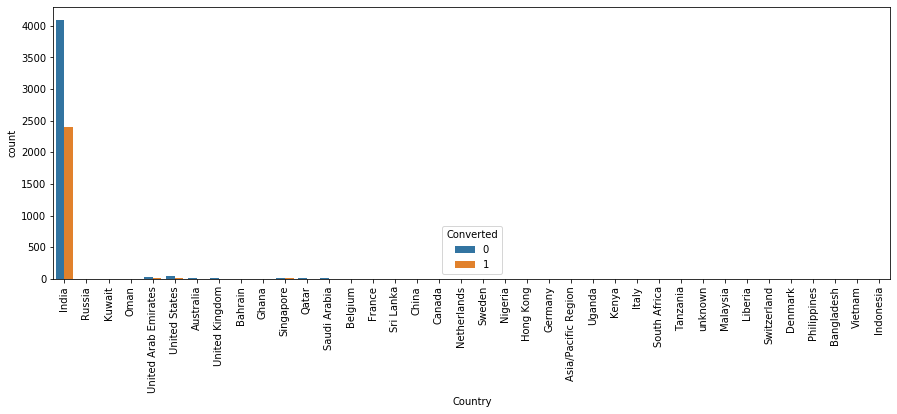

In [27]:
#spread of Country columnn - Plot
plt.figure(figsize=(15,5))
s_c=sns.countplot(df_leads.Country, hue=df_leads.Converted)
s_c.set_xticklabels(s_c.get_xticklabels(),rotation=90)
plt.show()

In [28]:
#India is the most common occurance, replacing missing values with India
df_leads['Country'] = df_leads['Country'].replace(np.nan,'India')

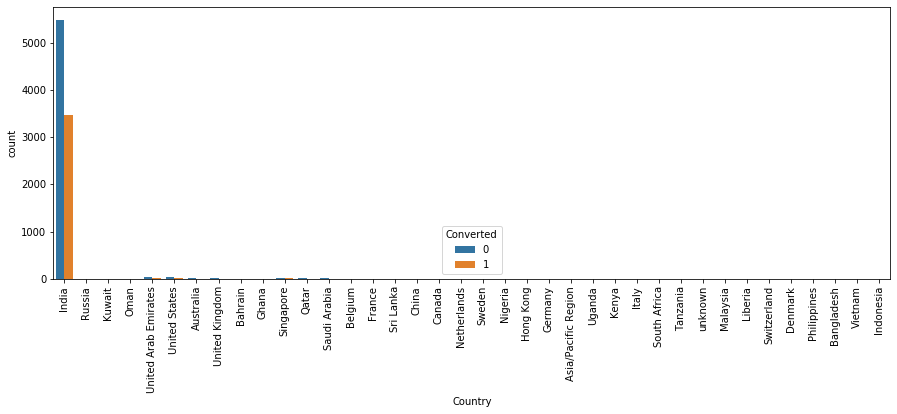

In [29]:
#spread of Country columnn - Plotting again
plt.figure(figsize=(15,5))
s_c=sns.countplot(df_leads.Country, hue=df_leads.Converted)
s_c.set_xticklabels(s_c.get_xticklabels(),rotation=90)
plt.show()

In [30]:
# Rechecking the percentage of missing values
round(100*(df_leads.isnull().sum()/len(df_leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Recommendations                           0.00
A free cop

In [31]:
# Let's start with first columns of missing values

df_leads['Lead Source'].value_counts().head(5)   # Lead Source column

Google            2868
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Name: Lead Source, dtype: int64

Google is having highest number of occurences, hence we will impute the missing values with label 'Google'

In [32]:
df_leads.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                             0
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement                               0
Through Recommendations                             0
A free copy of Mastering The

In [33]:
# TotalVisits column

df_leads['TotalVisits'].value_counts().head(5)

0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
Name: TotalVisits, dtype: int64

0.0 is having highest number of occurences, hence we will impute the missing values with label '0.0'

In [34]:
df_leads['Page Views Per Visit'].value_counts().head(5)

0.0    2189
2.0    1795
3.0    1196
4.0     896
1.0     651
Name: Page Views Per Visit, dtype: int64

0.0 is having highest number of occurences, hence we will impute the missing values with label '0.0'

In [35]:
df_leads['Last Activity'].value_counts().head(5)

Email Opened               3437
SMS Sent                   2745
Olark Chat Conversation     973
Page Visited on Website     640
Converted to Lead           428
Name: Last Activity, dtype: int64

Email Opened is having highest number of occurences, hence we will impute the missing values with label 'Email Opened'

In [36]:
df_leads['What is your current occupation'].value_counts().head(5)

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Name: What is your current occupation, dtype: int64

Unemployed is having highest number of occurences, hence we will impute the missing values with label 'Unemployed'

In [37]:
 
df_leads['What matters most to you in choosing a course'].value_counts().head(5)

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

Better Career Prospects is having highest number of occurences, hence we will impute the missing values with label 'Better Career Prospects'

In [38]:
missing_values={'Lead Source':'Google',
                'TotalVisits':0.0,
                'Page Views Per Visit':0.0,
                'Last Activity':'Email Opened',
                'What is your current occupation':'Unemployed',
                'What matters most to you in choosing a course':'Better Career Prospects'}

df_leads=df_leads.fillna(value=missing_values)

In [39]:
df_leads.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations                          0
A free copy of Mastering The Interview           0
Last Notable Activity          

Now all columns are having no missing values, we are good to go for our next analysis

In [40]:
df_leads['Lead Source'].value_counts()

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
welearnblog_Home        1
blog                    1
WeLearn                 1
testone                 1
NC_EDM                  1
Pay per Click Ads       1
youtubechannel          1
Name: Lead Source, dtype: int64

In [41]:
#we need to capitalize as Google and google are similar values but case sensitive.

df_leads['Lead Source']=df_leads['Lead Source'].apply(lambda x:x.capitalize())

df_leads['Lead Source'].value_counts()

Google               2909
Direct traffic       2543
Olark chat           1755
Organic search       1154
Reference             534
Welingak website      142
Referral sites        125
Facebook               55
Bing                    6
Click2call              4
Press_release           2
Live chat               2
Social media            2
Nc_edm                  1
Blog                    1
Welearnblog_home        1
Youtubechannel          1
Welearn                 1
Testone                 1
Pay per click ads       1
Name: Lead Source, dtype: int64

<a id="3"></a> <br>
## Step 3 : EDA


#### Categorical Variables

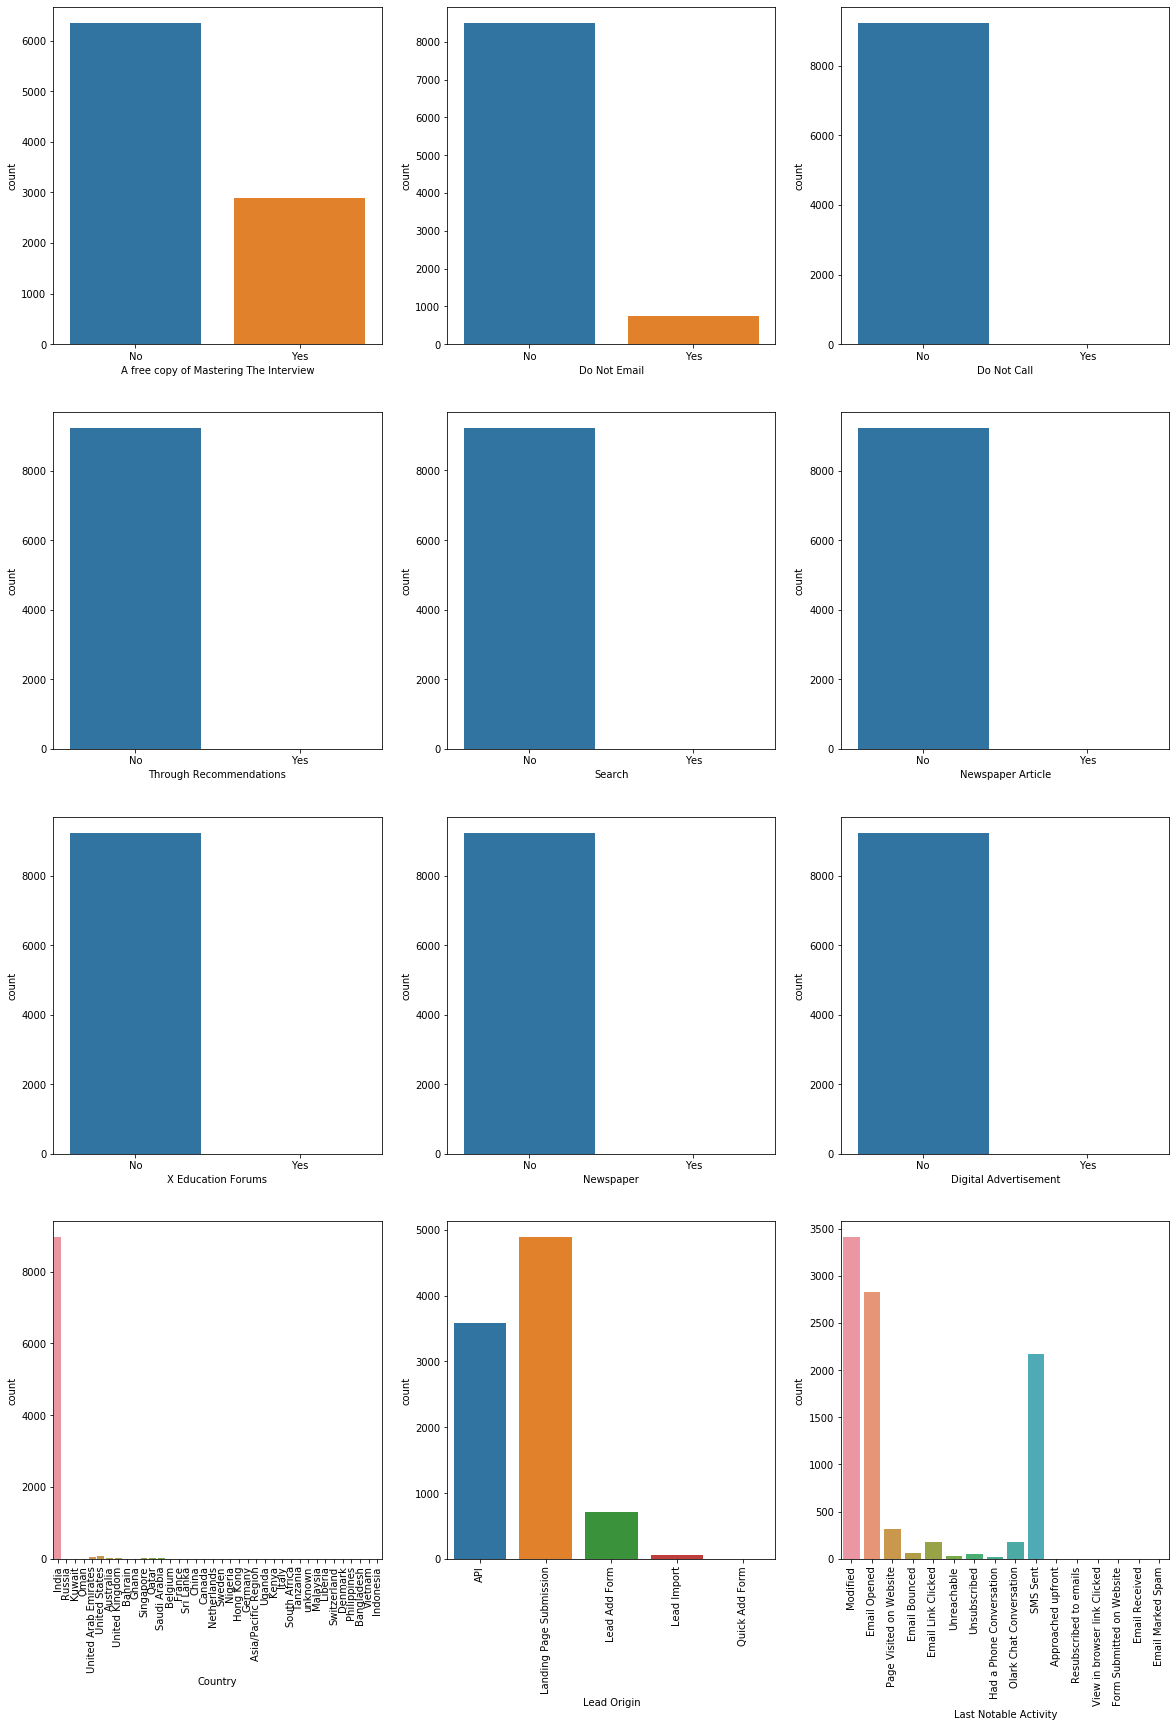

In [42]:
plt.figure(figsize = (20,36))


plt.subplot(5,3,1)
sns.countplot(df_leads['A free copy of Mastering The Interview'])

plt.subplot(5,3,2)
sns.countplot(df_leads['Do Not Email'])

plt.subplot(5,3,3)
sns.countplot(df_leads['Do Not Call'])

plt.subplot(5,3,4)
sns.countplot(df_leads['Through Recommendations'])

plt.subplot(5,3,5)
sns.countplot(df_leads['Search'])

plt.subplot(5,3,6)
sns.countplot(df_leads['Newspaper Article'])

plt.subplot(5,3,7)
sns.countplot(df_leads['X Education Forums'])

plt.subplot(5,3,8)
sns.countplot(df_leads['Newspaper'])

plt.subplot(5,3,9)
sns.countplot(df_leads['Digital Advertisement'])

plt.subplot(5,3,10)
sns.countplot(df_leads['Country']).tick_params(axis='x', rotation = 90)

plt.subplot(5,3,11)
sns.countplot(df_leads['Lead Origin']).tick_params(axis='x', rotation = 90)

plt.subplot(5,3,12)
sns.countplot(df_leads['Last Notable Activity']).tick_params(axis='x', rotation = 90)

plt.savefig('categorial_analysis.png')
plt.show()

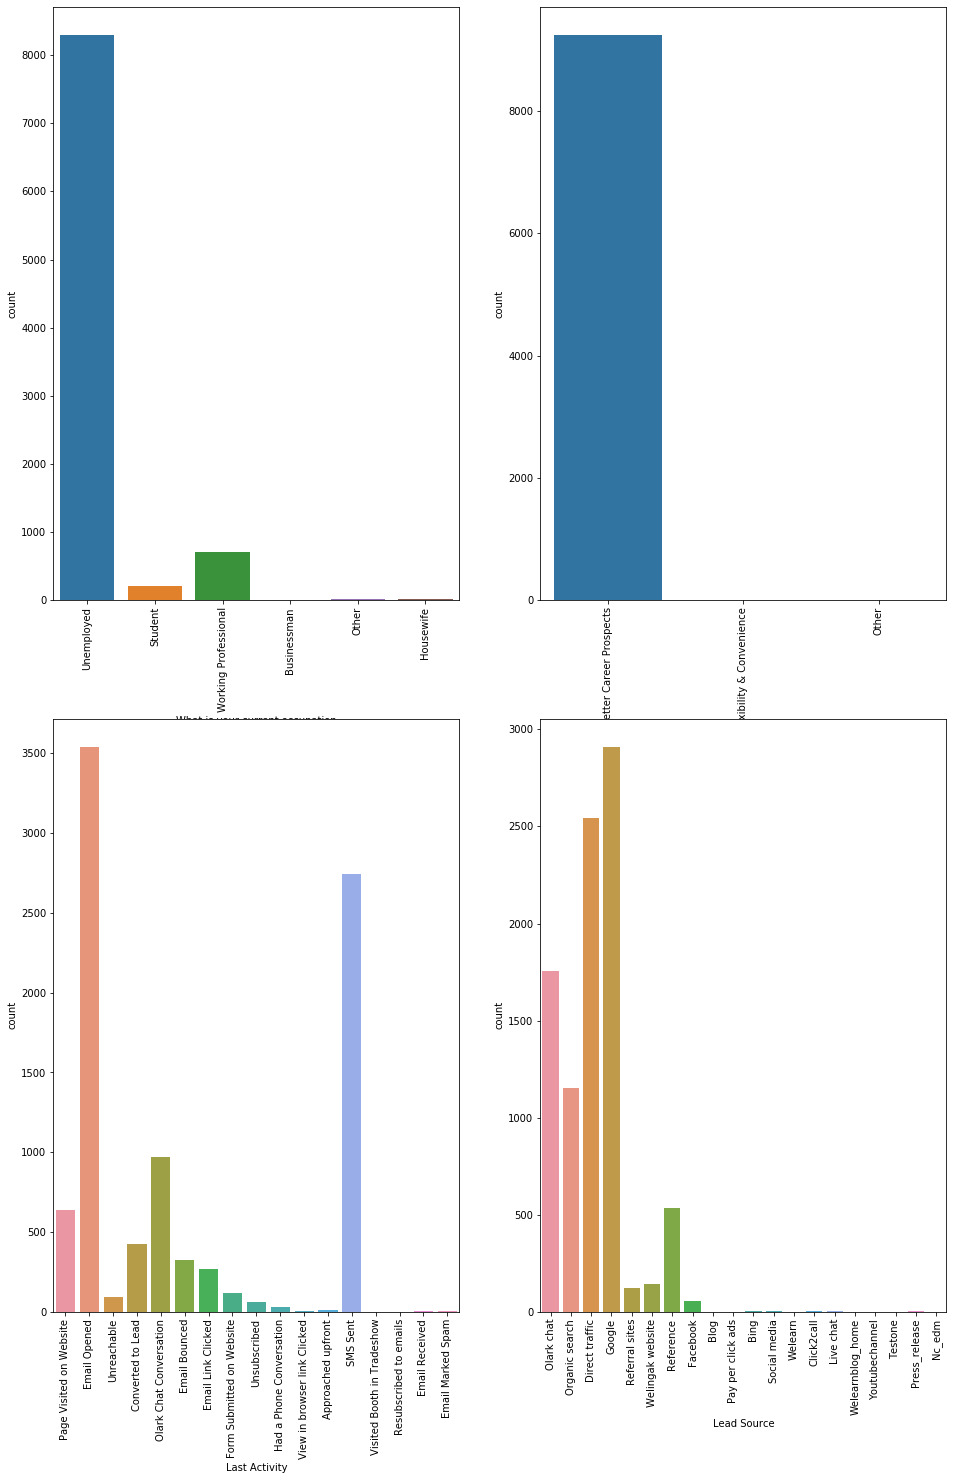

In [43]:
plt.figure(figsize = (16,24))

plt.subplot(2,2,1)
sns.countplot(df_leads['What is your current occupation']).tick_params(axis='x', rotation = 90)

plt.subplot(2,2,2)
sns.countplot(df_leads['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)

plt.subplot(2,2,3)
sns.countplot(df_leads['Last Activity']).tick_params(axis='x', rotation = 90)

plt.subplot(2,2,4)
sns.countplot(df_leads['Lead Source']).tick_params(axis='x', rotation = 90)


plt.show()



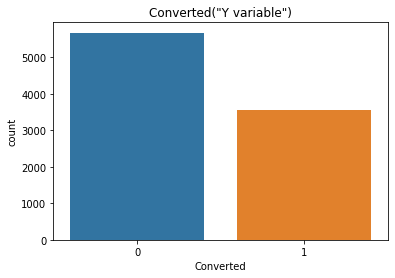

In [44]:
sns.countplot(df_leads['Converted'])
plt.title('Converted("Y variable")')
plt.show()

#### Numerical Variables

In [45]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

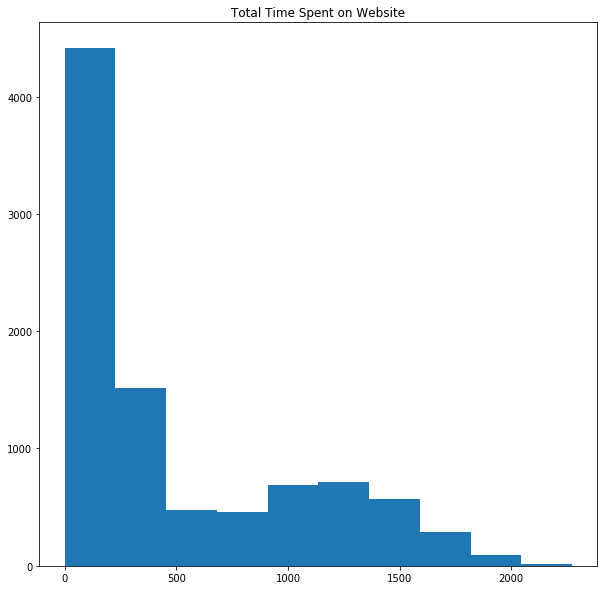

In [46]:
plt.figure(figsize = (10,10))


plt.hist(df_leads['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')
plt.show()

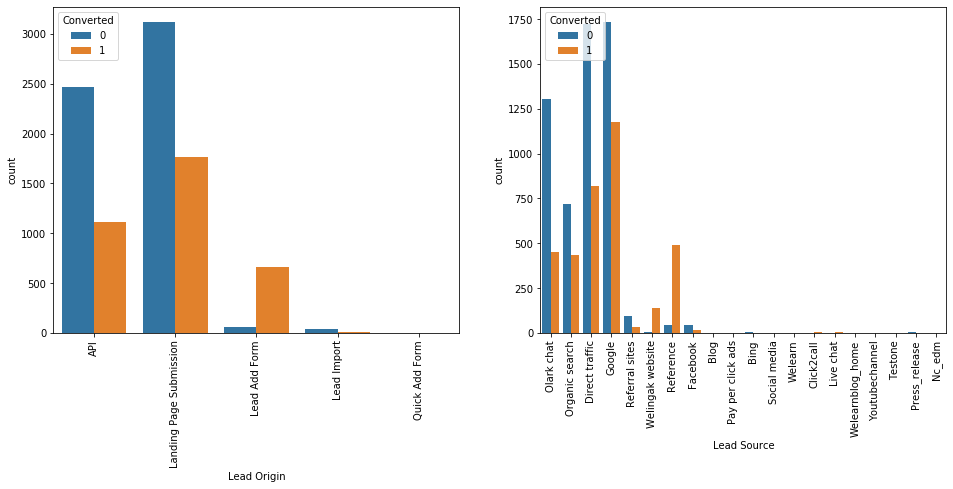

In [47]:
plt.figure(figsize = (16,6))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= df_leads).tick_params(axis='x', rotation = 90)


plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= df_leads).tick_params(axis='x', rotation = 90)

plt.show()

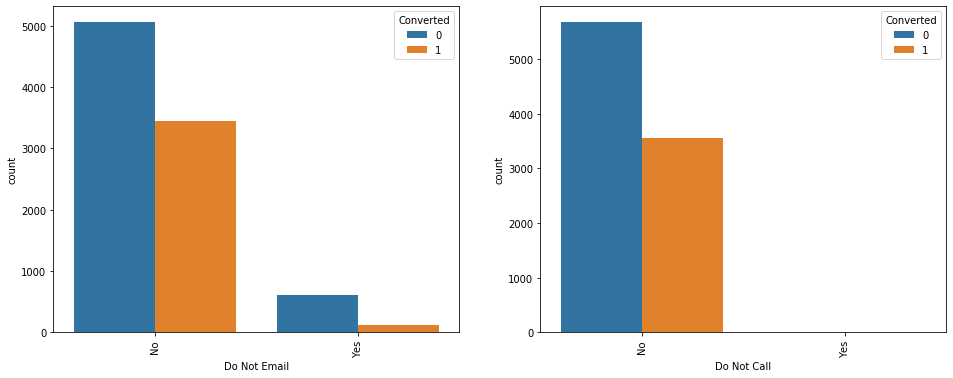

In [48]:


plt.figure(figsize = (16,6))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= df_leads).tick_params(axis='x', rotation = 90)


plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= df_leads).tick_params(axis='x', rotation = 90)

plt.show()



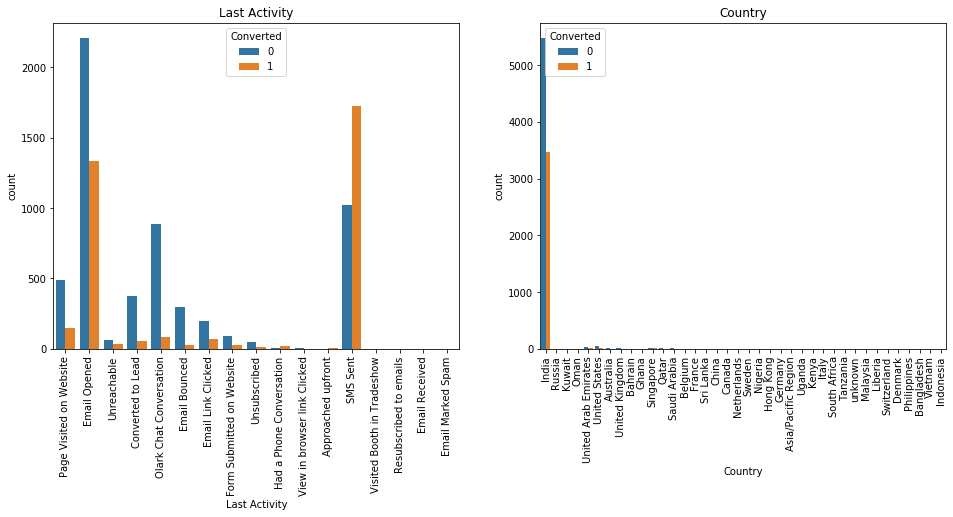

In [49]:
plt.figure(figsize = (16,6))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= df_leads).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= df_leads).tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()

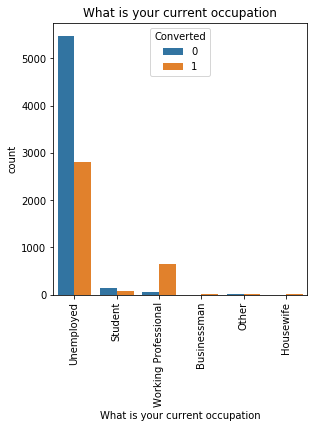

In [50]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='What is your current occupation', hue='Converted', data= df_leads).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

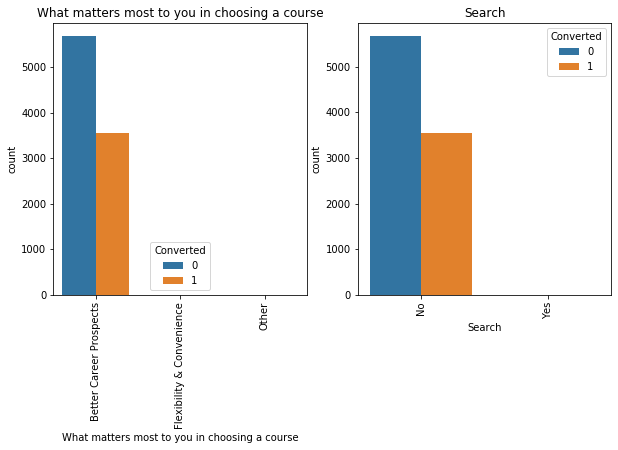

In [51]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= df_leads).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= df_leads).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

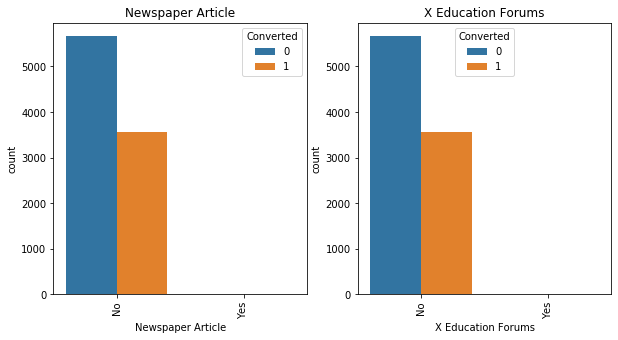

In [52]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= df_leads).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= df_leads).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')
plt.show()

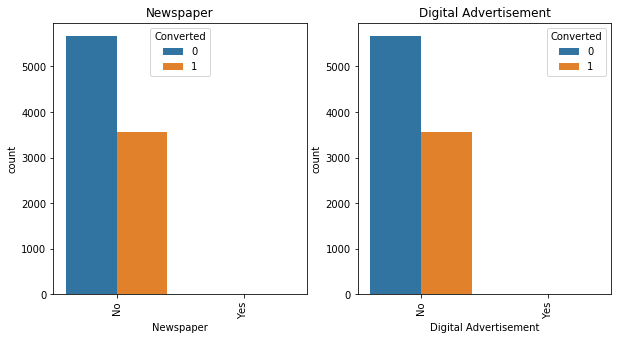

In [53]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= df_leads).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= df_leads).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')
plt.show()

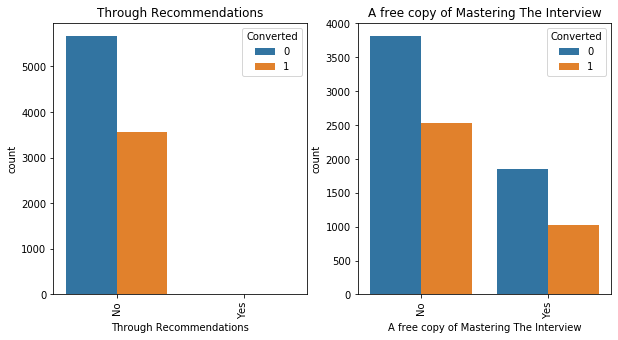

In [54]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= df_leads).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= df_leads).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

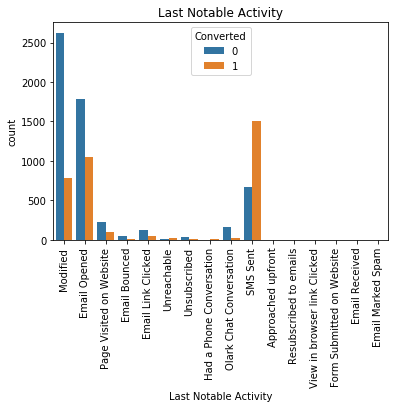

In [55]:
sns.countplot(x='Last Notable Activity', hue='Converted', data= df_leads).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

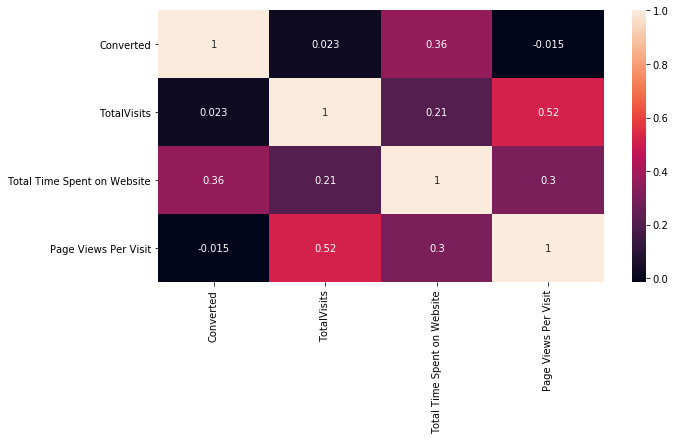

In [56]:
# To check the correlation among varibles
plt.figure(figsize=(10,5))
sns.heatmap(df_leads.corr(), annot=True)
plt.show()

<a id="4"></a> <br>
## Step 4 : Data Transformation

Assigning numerical variables to categories with 'Yes' to 1 and 'No' to 0 or converting binary variables (Yes/No) to (1/0)

In [57]:
# Yes : 1 , No : 0

category={"No":0,"Yes":1}    # creating dictionary for two categories

# Column 'Do Not Email'

df_leads['Do Not Email']=df_leads['Do Not Email'].map(category)

# Column 'Do Not Call'

df_leads['Do Not Call']=df_leads['Do Not Call'].map(category)

# Column 'Search'

df_leads['Search']=df_leads['Search'].map(category)

# Column 'Newspaper Article'

df_leads['Newspaper Article']=df_leads['Newspaper Article'].map(category)

# Column 'X Education Forums'

df_leads['X Education Forums']=df_leads['X Education Forums'].map(category)

# Column 'Newspaper'

df_leads['Newspaper']=df_leads['Newspaper'].map(category)

# Column 'Digital Advertisement'

df_leads['Digital Advertisement']=df_leads['Digital Advertisement'].map(category)

# Column 'Through Recommendations'

df_leads['Through Recommendations']=df_leads['Through Recommendations'].map(category)

#Column 'A free copy of Mastering The Interview'

df_leads['A free copy of Mastering The Interview']=df_leads['A free copy of Mastering The Interview'].map(category)


After conversion from Yes-> 1 and No->0, we will use dummy variables for multiple levels of categories.

In [58]:
# Creating a dummy variables for categorical variables and dropping the first level.

dummy=pd.get_dummies(df_leads[['Lead Origin','Lead Source','Last Activity','What is your current occupation',
                             'What matters most to you in choosing a course','Last Notable Activity']],drop_first=True)

# Adding these dummies to our original dataset

df_leads=pd.concat([df_leads,dummy],axis=1)

df_leads.shape

(9240, 81)

Let's remove duplicate/repeated columns

In [59]:
duplicates=['Lead Origin','Lead Source','Last Activity','What is your current occupation',
            'What matters most to you in choosing a course','Last Notable Activity']


df_leads=df_leads.drop(duplicates,1)

df_leads.shape

(9240, 75)

In [60]:
#Converting some categorical variables to numerical, as they are imported as 'Object'

df_leads[['TotalVisits','Page Views Per Visit']]=df_leads[['TotalVisits','Page Views Per Visit']].apply(pd.to_numeric)

df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 75 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Do Not Email                                                             9240 non-null   int64  
 1   Do Not Call                                                              9240 non-null   int64  
 2   Converted                                                                9240 non-null   int64  
 3   TotalVisits                                                              9240 non-null   float64
 4   Total Time Spent on Website                                              9240 non-null   int64  
 5   Page Views Per Visit                                                     9240 non-null   float64
 6   Country                                                                 

In [61]:
df_leads['Country'].value_counts()

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Netherlands                2
Bangladesh                 2
China                      2
Ghana                      2
Asia/Pacific Region        2
Belgium                    2
Philippines                2
Italy                      2
Uganda                     2
Indonesia                  1
Denmark                    1
Liberia                    1
Kenya                      1
Malaysia                   1
Switzerland                1
Vietnam       

In [62]:
#Dropping country as it will not help with analysis
df_leads=df_leads.drop('Country',1)

### Checking for Outliers

In [63]:
round(df_leads.describe(percentiles=[0.15,0.35,0.55,0.75,0.95]),2)

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,...,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00
mean,0.08,0.00,0.39,3.39,487.70,2.33,0.00,0.00,0.00,0.00,...,0.00,0.00,0.37,0.02,0.03,0.00,0.24,0.00,0.01,0.00
std,0.27,0.01,0.49,4.84,548.02,2.16,0.04,0.01,0.01,0.01,...,0.01,0.04,0.48,0.14,0.18,0.01,0.42,0.06,0.07,0.01
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
15%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
35%,0.00,0.00,0.00,2.00,98.00,1.50,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,3.00,248.00,2.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
55%,0.00,0.00,0.00,3.00,305.00,2.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,1.00,5.00,936.00,3.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
95%,1.00,0.00,1.00,10.00,1562.00,6.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00


Above table depicts the outliers in variables - 'Total Visits', 'Total Time Spent on Website' and 'Page Views Per Visit'.

Visualizing the outliers using boxplot

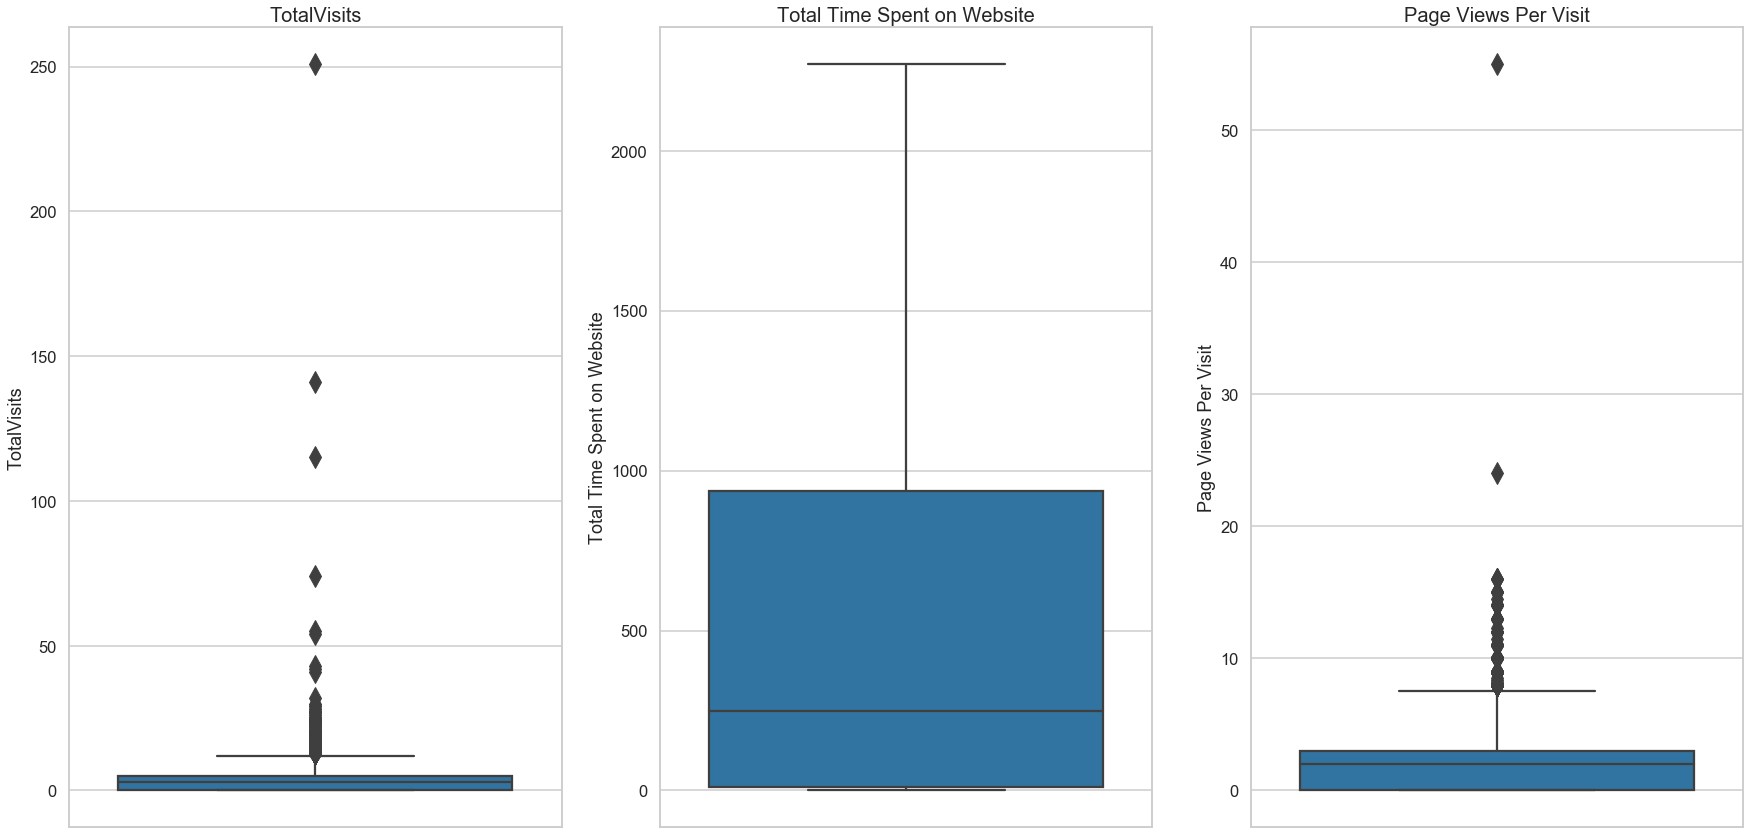

In [64]:
# Setting size of figure, context and gridlines

plt.figure(figsize=(30,50))
plt.tight_layout()
sns.set_style('whitegrid')
sns.set_context('talk')

# Title names for the columns in the dataset

col={0:'TotalVisits',1:'Total Time Spent on Website',2:'Page Views Per Visit'}

# Visualising the outliers with boxplot 
for i in range(3):
    plt.subplot(3,3,i+1)
    plt.title(col[i],fontsize=20)
    sns.boxplot(x=df_leads[col[i]],data=df_leads,palette=None,orient='v',fliersize=15)  

based on above boxplot graphs, we confirm that 'Total Visits' and 'Page Views Per Visit' include outliers. Instead of dropping the variables, we will create bins, otherwise these will impact are our analysis.

### Creating bins

In [65]:
# For 'TotalVisits' variable

# As we have range from 0 to 251 for'TotalVisits' variable

ranges_total_visits={'TotalVisits_0_50': 50,'TotalVisits_50_100': 100,'TotalVisits_100_150': 150,
                     'TotalVisits_150_200' : 200,'TotalVisits_200_250': 250,'TotalVisits_250_300': 300}

# Assigning '1' or '0' to each bins

for i in range(len(list(ranges_total_visits.keys()))):
    df_leads[list(ranges_total_visits.keys())[i]]=df_leads['TotalVisits'].map(lambda x: 1 if (x < list(ranges_total_visits.values())[i] and x >= (list(ranges_total_visits.values())[i] - 50)) else 0)

In [66]:
# For 'Page Views Per Visit' variable

# As we have range from 0 to 55 for'Page Views Per Visit' variable

ranges_total_visits_1={'Page Views Per Visit_0_10': 10,'Page Views Per Visit_10_20': 20,'Page Views Per Visit_20_30': 30,
                     'Page Views Per Visit_30_40' : 40,'Page Views Per Visit_40_50': 50,'Page Views Per Visit_50_60': 60}

# Assigning '1' or '0' to each bins

for i in range(len(list(ranges_total_visits_1.keys()))):
    df_leads[list(ranges_total_visits_1.keys())[i]]=df_leads['Page Views Per Visit'].map(lambda x: 1 if (x < list(ranges_total_visits_1.values())[i] and x >= (list(ranges_total_visits_1.values())[i] - 10)) else 0)

In [67]:
df_leads.head(5)

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,TotalVisits_100_150,TotalVisits_150_200,TotalVisits_200_250,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_30_40,Page Views Per Visit_40_50,Page Views Per Visit_50_60
0,0,0,0,0.0,0,0.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,1.0,305,1.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


Removing redundant columns since we have created the bin.

In [68]:
redundant_col_list = ['TotalVisits','Page Views Per Visit']

df_leads=df_leads.drop(redundant_col_list,axis=1)

df_leads.head()

,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,...,TotalVisits_100_150,TotalVisits_150_200,TotalVisits_200_250,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_30_40,Page Views Per Visit_40_50,Page Views Per Visit_50_60
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,674,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,1,1532,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,305,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,1428,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


<a id="5"></a> <br>
## Step 5 : Data Preparation

#### Splitting the data in Train and Test Sets

In [69]:
# Importing train-test-split method from sklearn - model selection

from sklearn.model_selection import train_test_split


In [70]:

leads_df_dp = df_leads.copy()


In [71]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)

df_train, df_test = train_test_split(leads_df_dp, train_size = 0.7, test_size = 0.3, random_state = 100)


In [72]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [73]:
# Apply scaler() to all the columns except the'dummy' variables.

num_vars=['Total Time Spent on Website']

df_train[num_vars]= scaler.fit_transform(df_train[num_vars])


In [74]:
df_train.head()


,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,...,TotalVisits_100_150,TotalVisits_150_200,TotalVisits_200_250,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_30_40,Page Views Per Visit_40_50,Page Views Per Visit_50_60
1871,0,0,0,0.000000,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6795,0,0,0,0.214349,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3516,0,0,0,0.046655,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8105,0,0,0,0.541373,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3934,0,0,0,0.000000,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [75]:
outcome = 'Converted'

y_train = df_train.pop(outcome)
X_train = df_train
y_test = df_test.pop(outcome)
X_test = df_test


In [76]:
y_train


1871    0
6795    0
3516    0
8105    0
3934    0
       ..
350     1
79      1
8039    1
6936    0
5640    0
Name: Converted, Length: 6468, dtype: int64

In [77]:
## Checking the conversion rate from 'converted' column as it denotes the target variable
y = leads_df_dp['Converted']
(sum(y)/len(y.index))*100


38.53896103896104

the conversion rate is of almost 39%

#### Checking Correlation

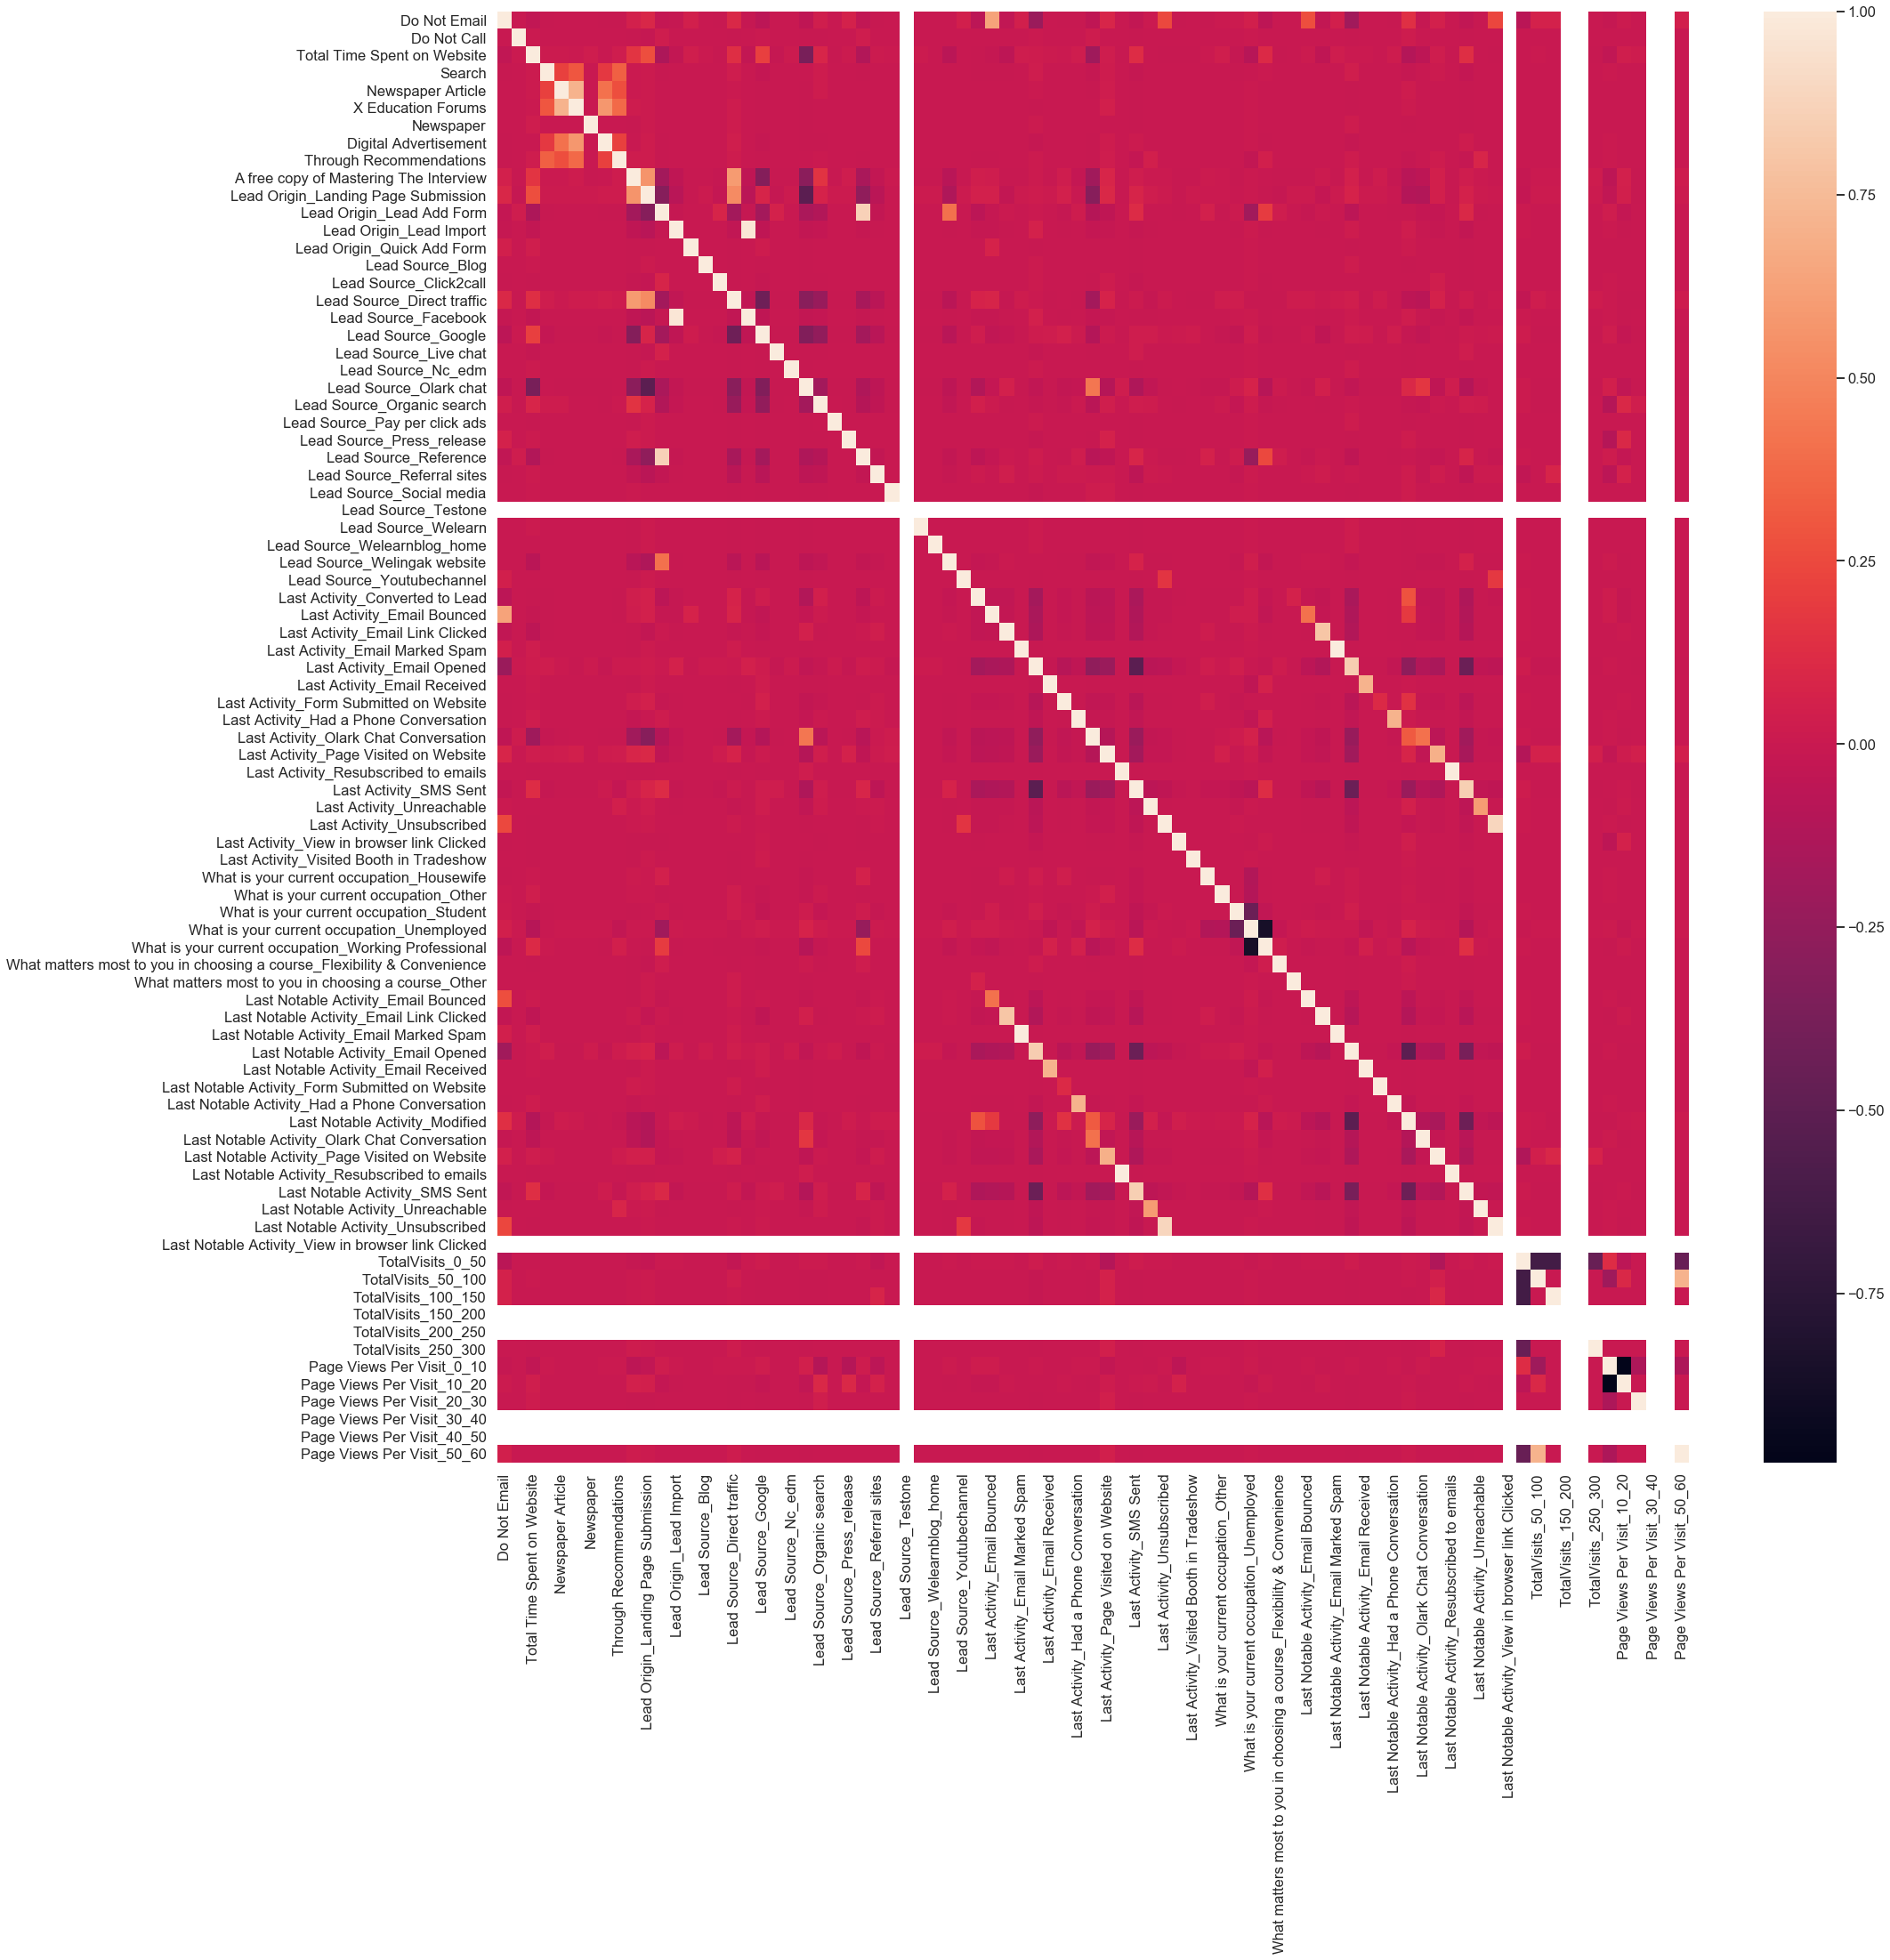

In [78]:
# To check the correlation among varibles
plt.figure(figsize=(30,30))
sns.heatmap(X_train.corr())
plt.show()


<a id="6"></a> <br>
## Step 6 : Building a Model

In [79]:
# importing necessary library

import statsmodels.api as sm

In [80]:
logis=sm.GLM(y_train,(sm.add_constant(X_train)),familt=sm.families.Binomial())
logis.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6395
Model Family:                Gaussian   Df Model:                           72
Link Function:               identity   Scale:                         0.13684
Method:                          IRLS   Log-Likelihood:                -2708.6
Date:                Wed, 25 Nov 2020   Deviance:                       875.06
Time:                        20:11:05   Pearson chi2:                     875.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                       0.7231      0.222      3.264      0.001       0.289       1.157
Do Not Email                                                               -0.1237      0.025     -5.045      0.000      -0.172      -0.076
Do Not Call                                                                 0.4899      0.262      1.869      0.062      -0.024       1.004
Total Time Spent on Website                                                 0.7629      0.022     35.199      0.000       0.720       0.805
Search                                                                      0.0873      0.121      0.719      0.472      -0.151       0.325
Newspaper Article                                                           0.6312      0.371      1.703      0.089      -0.095       1.358
X Education Forums                                                         -0.7013      0.611     -1.147      0.251      -1.899       0.497
Newspaper                                                                  -0.6883      0.370     -1.858      0.063      -1.414       0.038
Digital Advertisement                                                      -0.3835      0.262     -1.463      0.143      -0.897       0.130
Through Recommendations                                                     0.1419      0.157      0.902      0.367      -0.166       0.450
A free copy of Mastering The Interview                                     -0.0018      0.014     -0.126      0.899      -0.030       0.026
Lead Origin_Landing Page Submission                                        -0.0242      0.014     -1.690      0.091      -0.052       0.004
Lead Origin_Lead Add Form                                                   0.4844      0.071      6.794      0.000       0.345       0.624
Lead Origin_Lead Import                                                     0.1793      0.264      0.678      0.498      -0.339       0.698
Lead Origin_Quick Add Form                                                  0.3407      0.371      0.917      0.359      -0.387       1.069
Lead Source_Blog                                                           -0.4541      0.427     -1.063      0.288      -1.292       0.383
Lead Source_Click2call                                                     -0.1328      0.311     -0.428      0.669      -0.742       0.476
Lead Source_Direct traffic                                                 -0.1469      0.214     -0.687      0.492      -0.566       0.272
Lead Source_Facebook                                                       -0.3238      0.340     -0.953      0.341      -0.990       0.342
Lea

From the above summary presented by generalizing linear model, we can tell that there are so many variable with insignificant p-values. Here we will use rfe for feature selection as we have 70 variables and checking one by one is not an efficient way to do so.

In [81]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [82]:
# Import RFE
from sklearn.feature_selection import RFE

In [83]:
# Running RFE with 15 variables as output
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [84]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 8),
 ('Total Time Spent on Website', True, 1),
 ('Search', False, 25),
 ('Newspaper Article', False, 21),
 ('X Education Forums', False, 47),
 ('Newspaper', False, 7),
 ('Digital Advertisement', False, 6),
 ('Through Recommendations', False, 33),
 ('A free copy of Mastering The Interview', False, 62),
 ('Lead Origin_Landing Page Submission', False, 45),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 55),
 ('Lead Origin_Quick Add Form', False, 16),
 ('Lead Source_Blog', False, 28),
 ('Lead Source_Click2call', False, 39),
 ('Lead Source_Direct traffic', False, 24),
 ('Lead Source_Facebook', False, 29),
 ('Lead Source_Google', False, 32),
 ('Lead Source_Live chat', False, 52),
 ('Lead Source_Nc_edm', False, 17),
 ('Lead Source_Olark chat', True, 1),
 ('Lead Source_Organic search', False, 30),
 ('Lead Source_Pay per click ads', False, 48),
 ('Lead Source_Press_release', False, 43),
 ('Lead Source_Reference', 

In [85]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

In [86]:
 col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark chat',
       'Lead Source_Welingak website', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [87]:
# Selecting columns selected by RFE
X_train = X_train[col]


In [88]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2698.1
Date:                Wed, 25 Nov 2020   Deviance:                       5396.2
Time:                        20:11:09   Pearson chi2:                 7.11e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9012      0.081    -11.137      0.000      -1.060      -0.743
Do Not Email                                            -1.2466      0.195     -6.387      0.000      -1.629      -0.864
Total Time Spent on Website                              4.5739      0.163     27.997      0.000       4.254       4.894
Lead Origin_Lead Add Form                                3.7950      0.191     19.905      0.000       3.421       4.169
Lead Source_Olark chat                                   1.1718      0.102     11.457      0.000       0.971       1.372
Lead Source_Welingak website                             1.9692      0.744      2.647      0.008       0.511       3.427
Last Activity_Email Bounced                             -1.0898      0.347     -3.139      0.002      -1.770      -0.409
Last Activity_Olark Chat Conversation                   -1.0933      0.192     -5.692      0.000      -1.470      -0.717
What is your current occupation_Housewife               22.9736   1.37e+04      0.002      0.999   -2.68e+04    2.69e+04
What is your current occupation_Working Professional     2.7611      0.187     14.792      0.000       2.395       3.127
Last Notable Activity_Email Link Clicked                -1.9010      0.272     -6.982      0.000      -2.435      -1.367
Last Notable Activity_Email Opened                      -1.3147      0.087    -15.160      0.000      -1.485      -1.145
Last Notable Activity_Had a Phone Conversation           2.1462      1.099      1.952      0.051      -0.008       4.301
Last Notable Activity_Modified                          -1.8200      0.096    -19.049      0.000      -2.007      -1.633
Last Notable Activity_Olark Chat Conversation           -1.5720      0.373     -4.218      0.000      -2.302      -0.842
Last Notable Activity_Page Visited on Website           -1.5801      0.191     -8.254      0.000      -1.955      -1.205
========================================================================================================================
"""

In [89]:
# Importing VIF 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [90]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
6,Last Activity_Olark Chat Conversation,1.92
12,Last Notable Activity_Modified,1.81
0,Do Not Email,1.80
5,Last Activity_Email Bounced,1.79
3,Lead Source_Olark chat,1.56
1,Total Time Spent on Website,1.55
2,Lead Origin_Lead Add Form,1.38
10,Last Notable Activity_Email Opened,1.34
13,Last Notable Activity_Olark Chat Conversation,1.32
4,Lead Source_Welingak website,1.24


In [91]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [92]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2705.4
Date:                Wed, 25 Nov 2020   Deviance:                       5410.9
Time:                        20:11:09   Pearson chi2:                 7.13e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8990      0.081    -11.117      0.000      -1.058      -0.741
Do Not Email                                            -1.2496      0.195     -6.402      0.000      -1.632      -0.867
Total Time Spent on Website                              4.5694      0.163     28.006      0.000       4.250       4.889
Lead Origin_Lead Add Form                                3.8113      0.190     20.030      0.000       3.438       4.184
Lead Source_Olark chat                                   1.1653      0.102     11.408      0.000       0.965       1.366
Lead Source_Welingak website                             1.9453      0.744      2.615      0.009       0.487       3.403
Last Activity_Email Bounced                             -1.0934      0.347     -3.148      0.002      -1.774      -0.413
Last Activity_Olark Chat Conversation                   -1.0985      0.192     -5.722      0.000      -1.475      -0.722
What is your current occupation_Working Professional     2.7549      0.187     14.761      0.000       2.389       3.121
Last Notable Activity_Email Link Clicked                -1.8826      0.270     -6.979      0.000      -2.411      -1.354
Last Notable Activity_Email Opened                      -1.3085      0.087    -15.102      0.000      -1.478      -1.139
Last Notable Activity_Had a Phone Conversation           2.1445      1.099      1.951      0.051      -0.010       4.299
Last Notable Activity_Modified                          -1.8118      0.095    -18.992      0.000      -1.999      -1.625
Last Notable Activity_Olark Chat Conversation           -1.5635      0.373     -4.196      0.000      -2.294      -0.833
Last Notable Activity_Page Visited on Website           -1.5798      0.191     -8.254      0.000      -1.955      -1.205
========================================================================================================================
"""

In [93]:


# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif



,Features,VIF
6,Last Activity_Olark Chat Conversation,1.92
11,Last Notable Activity_Modified,1.81
0,Do Not Email,1.80
5,Last Activity_Email Bounced,1.79
3,Lead Source_Olark chat,1.56
1,Total Time Spent on Website,1.55
2,Lead Origin_Lead Add Form,1.38
9,Last Notable Activity_Email Opened,1.34
12,Last Notable Activity_Olark Chat Conversation,1.32
4,Lead Source_Welingak website,1.24


<a id="7"></a> <br>
## Step 7 : Creating a prediction

In [94]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.260732
6795    0.226524
3516    0.303861
8105    0.828460
3934    0.175740
4844    0.992435
3297    0.115419
8071    0.989452
987     0.255083
7423    0.904174
dtype: float64

In [95]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.26073204, 0.22652393, 0.30386077, 0.82846011, 0.17573994,
       0.99243545, 0.11541887, 0.98945222, 0.25508292, 0.90417352])

In [96]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred, 'ID':y_train.index})
y_train_pred_final.head()

,Converted,Conversion_Prob,ID
0,0,0.260732,1871
1,0,0.226524,6795
2,0,0.303861,3516
3,0,0.828460,8105
4,0,0.175740,3934


In [97]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,ID,Predicted
0,0,0.260732,1871,0
1,0,0.226524,6795,0
2,0,0.303861,3516,0
3,0,0.828460,8105,1
4,0,0.175740,3934,0


<a id="8"></a> <br>
## Step 8 : Evaluation of Model

In [98]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [99]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3545,  457],
       [ 751, 1715]])

In [100]:
# Predicted     not_churn    churn
# Actual
# not_churn        3403       492
# churn             729      1727

In [101]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8132343846629561

In [102]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [103]:
# Calculating the sensitivity
TP/(TP+FN)


0.6954582319545823

In [104]:
# Calculating the specificity
TN/(TN+FP)

0.8858070964517741

<a id="9"></a> <br>
## Step 9 : Optimise Cut off (ROC Curve)



The previous cut off was randomely selected. Now to find the optimum one


In [105]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None



In [106]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )


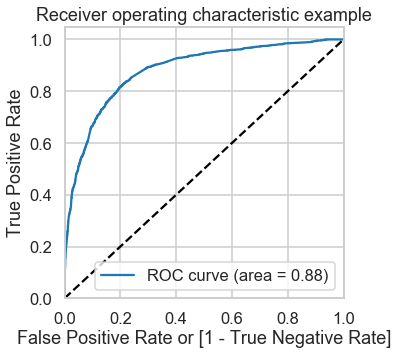

In [107]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)


In [108]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.260732,1871,0,1,1,1,0,0,0,0,0,0,0
1,0,0.226524,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.303861,3516,0,1,1,1,1,0,0,0,0,0,0
3,0,0.828460,8105,1,1,1,1,1,1,1,1,1,1,0
4,0,0.175740,3934,0,1,1,0,0,0,0,0,0,0,0


In [109]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df


,prob,accuracy,sensi,speci
0.0,0.0,0.381262,1.000000,0.000000
0.1,0.1,0.585034,0.966748,0.349825
0.2,0.2,0.757421,0.903893,0.667166
0.3,0.3,0.801020,0.838200,0.778111
0.4,0.4,0.812461,0.765207,0.841579
0.5,0.5,0.813234,0.695458,0.885807
0.6,0.6,0.795918,0.588402,0.923788
0.7,0.7,0.782622,0.512165,0.949275
0.8,0.8,0.758813,0.412003,0.972514
0.9,0.9,0.714750,0.270479,0.988506


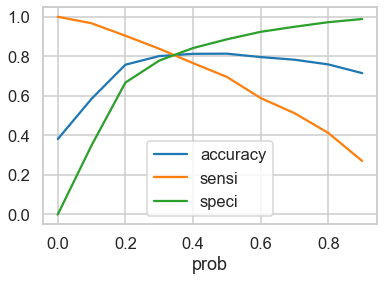

In [110]:


# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()



In [111]:


y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()



,Converted,Conversion_Prob,ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.260732,1871,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.226524,6795,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.303861,3516,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.828460,8105,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.175740,3934,0,1,1,0,0,0,0,0,0,0,0,0


In [112]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8073593073593074

In [113]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3250,  752],
       [ 494, 1972]])

In [114]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [115]:


# Calculating the sensitivity
TP/(TP+FN)



0.7996755879967559

In [116]:
# Calculating the specificity
TN/(TN+FP)

0.8120939530234883

<a id="10"></a> <br>
## Step 10 : Test Set Prediction

In [117]:
X_test[['Total Time Spent on Website']]=scaler.transform(X_test[['Total Time Spent on Website']])

In [118]:
# Substituting all the columns in the final train model
col = X_train.columns

In [119]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm


,const,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark chat,Lead Source_Welingak website,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
4269,1.0,0,0.444982,0,0,0,0,0,0,0,0,0,0,0,0
2376,1.0,0,0.000000,1,0,0,0,0,0,0,0,0,0,0,0
7766,1.0,0,0.025968,0,0,0,0,0,1,0,0,0,0,0,0
9199,1.0,0,0.000000,0,1,0,0,1,0,0,0,0,1,0,0
4359,1.0,0,0.000000,1,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8649,1.0,0,0.127641,0,0,0,0,0,0,0,0,0,0,0,1
2152,1.0,0,0.000000,1,0,0,0,0,0,0,0,0,0,0,0
7101,1.0,0,0.000000,0,1,0,0,0,0,0,1,0,0,0,0
5331,1.0,1,0.707746,0,0,0,0,0,0,0,0,0,1,0,0


In [120]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
#y_pred_df.reset_index(drop=True, inplace=True)
#y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.DataFrame({'Converted':y_test.values,'Conversion_Prob':y_test_pred.values,'ID':y_test.index})
#pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
#y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob',1:'ID'})
y_pred_final.head()

,Converted,Conversion_Prob,ID
0,1,0.756632,4269
1,1,0.948452,2376
2,1,0.878097,7766
3,0,0.066360,9199
4,1,0.832554,4359


In [121]:
y_test_df

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1
...,...
8649,0
2152,1
7101,0
5331,0


In [122]:
y_pred_final

,Converted,Conversion_Prob,ID
0,1,0.756632,4269
1,1,0.948452,2376
2,1,0.878097,7766
3,0,0.066360,9199
4,1,0.832554,4359
...,...,...,...
2767,0,0.130613,8649
2768,1,0.948452,2152
2769,0,0.260732,7101
2770,0,0.325984,5331


In [123]:
#Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

,Converted,Conversion_Prob,ID,final_predicted
0,1,0.756632,4269,1
1,1,0.948452,2376,1
2,1,0.878097,7766,1
3,0,0.066360,9199,0
4,1,0.832554,4359,1
...,...,...,...,...
2767,0,0.130613,8649,0
2768,1,0.948452,2152,1
2769,0,0.260732,7101,0
2770,0,0.325984,5331,0


In [124]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8127705627705628

In [125]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1377,  300],
       [ 219,  876]])

In [126]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]


In [127]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7448979591836735

In [128]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.8

<a id="11"></a> <br>
## Step 11 : Lead Score assigning


In [129]:
leads_df_dp

,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,...,TotalVisits_100_150,TotalVisits_150_200,TotalVisits_200_250,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_30_40,Page Views Per Visit_40_50,Page Views Per Visit_50_60
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,674,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,1,1532,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,305,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,1428,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,0,1,1845,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9236,0,0,0,238,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9237,1,0,0,199,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9238,0,0,1,499,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [130]:
y_pred_final['Lead Score']=y_pred_final['Conversion_Prob'].apply(lambda x:round(x*100))


y_pred_final.head()

,Converted,Conversion_Prob,ID,final_predicted,Lead Score
0,1,0.756632,4269,1,76
1,1,0.948452,2376,1,95
2,1,0.878097,7766,1,88
3,0,0.066360,9199,0,7
4,1,0.832554,4359,1,83


<a id="12"></a> <br>
## Step 12 : Conclusion

Insights from above analysis:
- Accuracy, Precision and Recall from test set seem to be in acceptable range.
- High recall score than precision score

Important features responsible for good conversion rate:
- Total Time Spent on Website	
- Lead Origin_Lead Add Form	
- What is your current occupation_Working Professional	
- Last Notable Activity_Had a Phone Conversation